In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import pandas as pd
import math
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
nltk.download('words')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm,tqdm_pandas
nltk.download('brown')
from nltk.corpus import brown

[nltk_data] Downloading package words to /home/yui/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /home/yui/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [2]:
words = brown.words(categories="news")
sents = brown.sents(categories=["news"])

In [3]:
print("Number of words: ",len(words))
print("Number of sentences: ",len(sents))
print("Number of unique words (including capitalized)",
      len(set(words)))

Number of words:  100554
Number of sentences:  4623
Number of unique words (including capitalized) 14394


In [4]:
print(sents[0])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']


In [5]:
w2id,id2w = dict(),dict()
freq,idx = dict(),1
w2id[None]=0
id2w[0]=None
freq[0]=0
for i,sent in enumerate(sents):
    prev = 0
    for word in sent:
        word = word.lower()
        if word not in w2id:
            w2id[word]=idx
            id2w[idx]=word
            idx+=1
        wid = w2id[word]
        freq[(prev,wid)]=freq.get((prev,wid),0)+1
        freq[prev]=freq.get(prev,0)+1
        prev = wid

In [6]:
print(len(w2id),len(freq))

13113 73927


In [7]:
p,V = dict(),len(w2id)
for key in freq.keys():
    if type(key)==int:
        continue
    u,v = key
    p[(u,v)] = np.log((freq[(u,v)]+1)/(freq[u]+V))

#### Bigrams Language Models
- To avoid numerical underflows and normalize the length of the sentence,
$$\begin{align*}
p(\{w_i\}^T_{i=1})&=p(w_1)\prod^T_{t=2}p(w_t|w_{t-1})\\
\log p(\{w_i\}^T_{i=1})&=\log p(w_1)+\sum^T_{t=2}\log p(w_t|w_{t-1})\\
\frac{1}{T}\log p(\{w_i\}^T_{i=1})&=\frac{1}{T}\bigg(\log p(w_1)+\sum^T_{t=2}\log p(w_t|w_{t-1})\bigg)
\end{align*}$$
- Brown Corpus Data: https://www.nltk.org/book/ch02.html
    - Genre includes, news, editorial, reviews, religion, hobbies, lore, belles_lettres, government, learned, fiction, mystery,science_fiction, adventure, romance and humor. 

In [8]:
res,resfake = [],[]
for sent in sents:
    prev,logprob,logprobfake = 0,0,0
    T = len(sent)
    for word in sent:
        word = word.lower()
        wid = w2id[word]
        logprob+=p.get((prev,wid),
                    -np.log(freq.get(prev,0)+V))
        prev = wid
    logprob/=T
    res.append(logprob)
    prev=0
    for wid in np.random.randint(1,len(w2id),T):
        logprobfake+=p.get((prev,wid),
                    -np.log(freq.get(prev,0)+V))
        prev = wid
    logprobfake/=T
    resfake.append(logprobfake)
    

Text(0, 0.5, 'log probability')

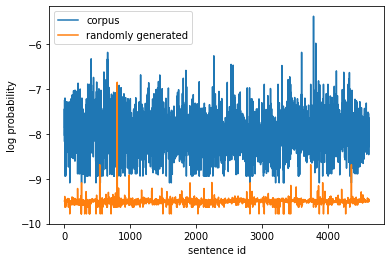

In [9]:
plt.plot(range(len(sents)),res,label='corpus')
plt.plot(range(len(sents)),resfake,label='randomly generated')
plt.legend()
plt.xlabel('sentence id')
plt.ylabel('log probability')